In [1]:
# READ THIS BEFORE RUNNING THIS PROGRAM
#
#Install the following python libraries using pip install as shown below:
# pip install matplotlib
# pip install pandas
# pip install requests
# pip install citipy
# pip install seaborn
# pip install plotly   <------------Don't forget this one.  You will need it to see a map with coordinates using this library

# Dependencies

%matplotlib inline

from random import uniform
import os
import time
import pandas as pd
import numpy as np
import requests
import json
from citipy import citipy
import matplotlib.pyplot as plt
import plotly
from citipy import citipy
import seaborn as sns

from config import APIKEY


#Define constants

base_url= 'http://api.openweathermap.org/data/2.5/weather?&q='
APPID ='&APPID=' + APIKEY
units = '&units=imperial'

In [2]:
get_url = base_url + 'bluff' + units + APPID

In [3]:
weather = requests.get(get_url)
weather_j= weather.json()

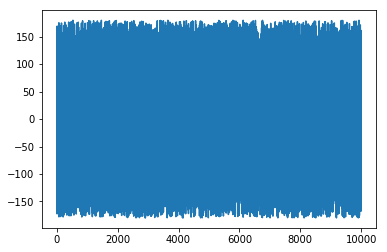

In [4]:
#Check the randomness of the uniform function

np.random.seed(42)   #Keep this the same for development and debugging purposes
N = 10000  # no of samples
x = range(N)
y = [np.random.uniform(-180,180) for i in x]
plt.plot(x, y)
plt.show()



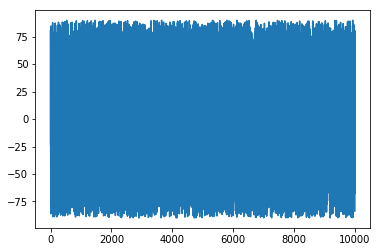

In [5]:
np.random.seed(42)   #Keep this the same for development and debugging purposes
N = 10000  # no of samples
x = range(N)
y = [np.random.uniform(-90,90) for i in x]
plt.plot(x, y)
plt.show()

In [6]:
#Plots are consistent with a uniform distribution

In [7]:
import time
now = time.strftime("%c")
print ("Current time %s"  % now )
print(now + ' url')
the_date = time.strftime("%x")
print(the_date)

Current time Tue Apr  3 01:12:58 2018
Tue Apr  3 01:12:58 2018 url
04/03/18


In [8]:
log_api_call_f = open('apilog.txt', 'w')        #This file contains a log of the API calls to the weather server
city_f = open('citydatax000.csv', 'w')          #This file is the CSV for the weather data provided by the weather server

#Write the column headings to CSV file
city_f.write('City,' +  'Latitude,' + 'Longitude,' + 'Temperature (F),' + 
             'Humidity (%),' + 'Cloudiness (%),' + 'Winds (mph),'+'\n')

np.random.seed(20)     #Set the seed for the pseudorandom number generator for debugging purposes

for i in range(2000):
    lat, lon = np.random.uniform(-90, 90), np.random.uniform(-180,180)
    location = (lat, lon)
    city = citipy.nearest_city(lat, lon)     #Get the nearest city from the random latitude and longitude
    
    
    get_url = base_url + city.city_name + units + APPID     #Assemble the API call with the city
    
    now = time.strftime("%c")
    
    no_api_url = base_url + city.city_name + units + 'XXXXXXXXXXXXXXXXXXXX'
    print(now + ' ' + no_api_url)
    log_api_call_f.write(now + ' ' + no_api_url +'\n')
    
    weather = requests.get(get_url)                         #Make the call to the server for the city's weather
    weather_j= weather.json()                               #Read th JSON information returned from the server
    if weather_j['cod'] == 200:                 #Make sure the server has weather information on the city,  Check the cod code 
        city_f.write(city.city_name + ',' + f'{lat:.6f}' + ',' + f'{lon:.6f}' + ',' + str(weather_j['main']['temp_max']) +',' + 
                     str(weather_j['main']['humidity']) +',' + str(weather_j['clouds']['all']) +',' + 
                     str(weather_j['wind']['speed']) +'\n')
#Processing Complete.  Close the file        
city_f.close()
log_api_call_f.close()

Tue Apr  3 01:12:58 2018 http://api.openweathermap.org/data/2.5/weather?&q=airai&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:12:58 2018 http://api.openweathermap.org/data/2.5/weather?&q=saskylakh&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:12:59 2018 http://api.openweathermap.org/data/2.5/weather?&q=taolanaro&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:12:59 2018 http://api.openweathermap.org/data/2.5/weather?&q=henties bay&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:12:59 2018 http://api.openweathermap.org/data/2.5/weather?&q=empalme&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:12:59 2018 http://api.openweathermap.org/data/2.5/weather?&q=mahebourg&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:12:59 2018 http://api.openweathermap.org/data/2.5/weather?&q=heihe&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:00 2018 http://api.openweathermap.org/data/2.5/weather?&q=bethel&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:00 2018 http://api.openweathermap.

Tue Apr  3 01:13:16 2018 http://api.openweathermap.org/data/2.5/weather?&q=kaitangata&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:16 2018 http://api.openweathermap.org/data/2.5/weather?&q=sovetskoye&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:17 2018 http://api.openweathermap.org/data/2.5/weather?&q=thompson&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:17 2018 http://api.openweathermap.org/data/2.5/weather?&q=busselton&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:17 2018 http://api.openweathermap.org/data/2.5/weather?&q=padang&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:17 2018 http://api.openweathermap.org/data/2.5/weather?&q=playas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:18 2018 http://api.openweathermap.org/data/2.5/weather?&q=grand river south east&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:18 2018 http://api.openweathermap.org/data/2.5/weather?&q=nikolskoye&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:18 2018 http:/

Tue Apr  3 01:13:29 2018 http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:29 2018 http://api.openweathermap.org/data/2.5/weather?&q=umzimvubu&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:29 2018 http://api.openweathermap.org/data/2.5/weather?&q=kavieng&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:29 2018 http://api.openweathermap.org/data/2.5/weather?&q=lompoc&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:29 2018 http://api.openweathermap.org/data/2.5/weather?&q=flin flon&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:29 2018 http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:30 2018 http://api.openweathermap.org/data/2.5/weather?&q=soddy-daisy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:30 2018 http://api.openweathermap.org/data/2.5/weather?&q=ahipara&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:30 2018 http://api.openweatherma

Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=abu dhabi&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=longhua&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=vaini&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=yerbogachen&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=manokwari&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=broome&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=qazanbulaq&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:40 2018 http://api.openweathermap.org/data/2.5/weather?&q=pevek&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:41 2018 http://api.openweathermap

Tue Apr  3 01:13:52 2018 http://api.openweathermap.org/data/2.5/weather?&q=saint-joseph&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:52 2018 http://api.openweathermap.org/data/2.5/weather?&q=punta gorda&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:53 2018 http://api.openweathermap.org/data/2.5/weather?&q=calabozo&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:53 2018 http://api.openweathermap.org/data/2.5/weather?&q=albany&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:53 2018 http://api.openweathermap.org/data/2.5/weather?&q=barrow&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:53 2018 http://api.openweathermap.org/data/2.5/weather?&q=castro&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:53 2018 http://api.openweathermap.org/data/2.5/weather?&q=yellowknife&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:53 2018 http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:13:53 2018 http://api.openweath

Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=port alfred&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=bethel&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=punta arenas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=mataura&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=belushya guba&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=belushya guba&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=new norfolk&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=avarua&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:02 2018 http://a

Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=saint george&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=qaanaaq&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=cidreira&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=derac&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=arraial do cabo&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=roebourne&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=victoria&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:14 2018 http://api.openw

Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=mataura&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=punta arenas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=gagnoa&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=lebu&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=road town&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=hobart&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=vanavara&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=vaitupu&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:24 2018 http://api.openweathermap.or

Tue Apr  3 01:14:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=russell&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=chokurdakh&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:35 2018 http://api.openweathermap.org/data/2.5/weather?&q=bilibino&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:35 2018 http://api.openweathermap.org/data/2.5/weather?&q=saskylakh&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:35 2018 http://api.openweathermap.org/data/2.5/weather?&q=jiuquan&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:35 2018 http://api.openweathermap.org/data/2.5/weather?&q=airai&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:35 2018 http://api.openweathermap.org/data/2.5/weather?&q=ribeira grande&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:35 2018 http://api.openweathermap.org/data/2.5/weather?&q=faanui&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:35 2018 http://api.openweathe

Tue Apr  3 01:14:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=poum&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=port-gentil&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=aklavik&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=dikson&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=kapaa&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=dingle&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=lorengau&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=ibra&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:44 2018 http://api.openweathermap.org/data/2

Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=arraial do cabo&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=torbay&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=puerto ayora&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=jamestown&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=nome&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=busselton&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=bredasdorp&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=norman wells&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:14:54 2018 http://api

Tue Apr  3 01:15:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=vysokogornyy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:02 2018 http://api.openweathermap.org/data/2.5/weather?&q=bani walid&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=hobart&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=kirakira&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=cape town&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=jamestown&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=bredasdorp&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=peleduy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:04 2018 http://api.openw

Tue Apr  3 01:15:11 2018 http://api.openweathermap.org/data/2.5/weather?&q=kaitangata&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=vaini&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=mataura&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=yellowknife&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=hobart&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=port elizabeth&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=clyde river&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=krasnoselkup&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:12 2018 http://api.

Tue Apr  3 01:15:21 2018 http://api.openweathermap.org/data/2.5/weather?&q=barentsburg&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:21 2018 http://api.openweathermap.org/data/2.5/weather?&q=chuy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:21 2018 http://api.openweathermap.org/data/2.5/weather?&q=yar-sale&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:22 2018 http://api.openweathermap.org/data/2.5/weather?&q=nakhon phanom&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:22 2018 http://api.openweathermap.org/data/2.5/weather?&q=mataura&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:22 2018 http://api.openweathermap.org/data/2.5/weather?&q=chimbote&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:22 2018 http://api.openweathermap.org/data/2.5/weather?&q=ust-kamchatsk&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:22 2018 http://api.openweathermap.org/data/2.5/weather?&q=surt&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:23 2018 http://api.openweat

Tue Apr  3 01:15:31 2018 http://api.openweathermap.org/data/2.5/weather?&q=taolanaro&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:31 2018 http://api.openweathermap.org/data/2.5/weather?&q=jamestown&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:31 2018 http://api.openweathermap.org/data/2.5/weather?&q=saint andrews&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:32 2018 http://api.openweathermap.org/data/2.5/weather?&q=kerava&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:32 2018 http://api.openweathermap.org/data/2.5/weather?&q=lazaro cardenas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:32 2018 http://api.openweathermap.org/data/2.5/weather?&q=albany&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:32 2018 http://api.openweathermap.org/data/2.5/weather?&q=maghama&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:32 2018 http://api.openweathermap.org/data/2.5/weather?&q=vaini&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:32 2018 http://api.openwe

Tue Apr  3 01:15:42 2018 http://api.openweathermap.org/data/2.5/weather?&q=harper&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=sorland&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=novo aripuana&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=saint-philippe&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=katsuura&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=srednekolymsk&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=tinskoy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=kirra&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:44 2018 http://api.ope

Tue Apr  3 01:15:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=geraldton&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=staryy nadym&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=kingman&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=yulara&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=lebu&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=sawtell&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=tecpan&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=lebu&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:15:55 2018 http://api.openweathermap.org/da

Tue Apr  3 01:16:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=bluff&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=fortuna&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:04 2018 http://api.openweathermap.org/data/2.5/weather?&q=thompson&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:04 2018 http://api.openweathermap.org/data/2.5/weather?&q=passos&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:04 2018 http://api.openweathermap.org/data/2.5/weather?&q=punta arenas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:04 2018 http://api.openweathermap.org/data/2.5/weather?&q=dunedin&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:04 2018 http://api.openweathermap.org/data/2.5/weather?&q=punta arenas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:04 2018 http://api.openweathermap.org/data/2.5/weather?&q=vestmannaeyjar&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:04 2018 http://api.openw

Tue Apr  3 01:16:11 2018 http://api.openweathermap.org/data/2.5/weather?&q=chokurdakh&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=leshukonskoye&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=hilo&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=hobart&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=ola&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:12 2018 http://api.openweathermap.org/data/2.5/weather?&q=komsomolskiy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:13 2018 http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:13 2018 http://api.openweathermap

Tue Apr  3 01:16:22 2018 http://api.openweathermap.org/data/2.5/weather?&q=seymchan&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:23 2018 http://api.openweathermap.org/data/2.5/weather?&q=kodiak&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:23 2018 http://api.openweathermap.org/data/2.5/weather?&q=ushuaia&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:23 2018 http://api.openweathermap.org/data/2.5/weather?&q=huangnihe&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:23 2018 http://api.openweathermap.org/data/2.5/weather?&q=taywarah&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=weihe&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=butaritari&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:24 2018 http://api.openweathermap.org/data/2.5/weather?&q=punta arenas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:24 2018 http://api.openweather

Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=hobart&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=stephenville crossing&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=egvekinot&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=laguna&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=port elizabeth&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=hilo&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=along&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openweathermap.org/data/2.5/weather?&q=rawson&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:34 2018 http://api.openw

Tue Apr  3 01:16:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=attawapiskat&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=kozhva&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=asau&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=chancay&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:45 2018 http://api.openweathermap.org/data/2.5/weather?&q=luganville&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:45 2018 http://api.openweathermap.org/data/2.5/weather?&q=shuyskoye&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:46 2018 http://api.openweathermap.org/data/2.5/weather?&q=dzhebariki-khaya&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:46 2018 http://api.openweathermap.org/data/2.5/weather?&q=rio de janeiro&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:46 2018 http://ap

Tue Apr  3 01:16:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=albany&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:54 2018 http://api.openweathermap.org/data/2.5/weather?&q=cabadiangan&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=pabrade&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=camacha&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=vestmanna&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=atuona&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=thompson&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:55 2018 http://api.openweathermap.org/data/2.5/weather?&q=new norfolk&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:16:56 2018 http://api.openweather

Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=seoul&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=avarua&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=tasiilaq&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=la palma&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=bandarbeyla&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=messina&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=petropavlovsk-kamchatskiy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://api.openweathermap.org/data/2.5/weather?&q=hermanus&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:03 2018 http://ap

Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=new norfolk&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=illoqqortoormiut&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=narsaq&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=belushya guba&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=muyezerskiy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=sumbawa&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=rudnogorsk&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018 http://api.openweathermap.org/data/2.5/weather?&q=ribeira grande&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:10 2018

Tue Apr  3 01:17:18 2018 http://api.openweathermap.org/data/2.5/weather?&q=fare&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweathermap.org/data/2.5/weather?&q=punta arenas&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweathermap.org/data/2.5/weather?&q=busselton&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweathermap.org/data/2.5/weather?&q=mamakan&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweathermap.org/data/2.5/weather?&q=kruisfontein&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweathermap.org/data/2.5/weather?&q=cape town&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweathermap.org/data/2.5/weather?&q=airai&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweathermap.org/data/2.5/weather?&q=vaini&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:19 2018 http://api.openweatherma

Tue Apr  3 01:17:27 2018 http://api.openweathermap.org/data/2.5/weather?&q=nushki&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:27 2018 http://api.openweathermap.org/data/2.5/weather?&q=thompson&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:27 2018 http://api.openweathermap.org/data/2.5/weather?&q=yunjinghong&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:27 2018 http://api.openweathermap.org/data/2.5/weather?&q=busselton&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:27 2018 http://api.openweathermap.org/data/2.5/weather?&q=cape town&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:27 2018 http://api.openweathermap.org/data/2.5/weather?&q=albany&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:28 2018 http://api.openweathermap.org/data/2.5/weather?&q=mahebourg&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:28 2018 http://api.openweathermap.org/data/2.5/weather?&q=tunduru&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:28 2018 http://api.openweather

Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=pilig&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=fairbanks&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=rikitea&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=busselton&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=sao filipe&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=hualmay&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.org/data/2.5/weather?&q=kapaa&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:37 2018 http://api.openweathermap.or

Tue Apr  3 01:17:42 2018 http://api.openweathermap.org/data/2.5/weather?&q=komsomolskiy&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=busselton&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=bacolod&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=atuona&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=samana&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:43 2018 http://api.openweathermap.org/data/2.5/weather?&q=tezu&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=cortez&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:44 2018 http://api.openweathermap.org/data/2.5/weather?&q=hobart&units=imperialXXXXXXXXXXXXXXXXXXXX
Tue Apr  3 01:17:44 2018 http://api.openweathermap.org/d

In [9]:
now = time.strftime("%c")
print ("End time: %s"  % now)

End time: Tue Apr  3 01:17:47 2018


In [10]:
weather_df = pd.read_csv('citydatax000.csv')
weather_df=weather_df.drop(weather_df.columns[weather_df.columns.str.contains('unnamed',case = False)],axis = 1)
weather_df.tail()

City   Latitude   Longitude  Temperature (F)  Humidity (%)  \
1800          dikson  85.742119   91.152104             1.55            91   
1801       guarapari -23.178081  -37.063587            78.80            83   
1802  severo-kurilsk  37.886616  161.245866            31.25            99   
1803        cidreira -38.480353  -39.175454            67.97            97   
1804      agua verde  22.680339 -106.250796            62.60           100   

      Cloudiness (%)  Winds (mph)  
1800              36        18.81  
1801               0         8.05  
1802              92        18.14  
1803              80         6.73  
1804              90         2.37

In [11]:
weather_df.shape

(1805, 7)

In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1805 entries, 0 to 1804
Data columns (total 7 columns):
City               1805 non-null object
Latitude           1805 non-null float64
Longitude          1805 non-null float64
Temperature (F)    1805 non-null float64
Humidity (%)       1805 non-null int64
Cloudiness (%)     1805 non-null int64
Winds (mph)        1805 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 98.8+ KB


In [13]:
weather_df['City'].value_counts(normalize=True)

ushuaia            0.034349
rikitea            0.034349
mataura            0.024377
busselton          0.023269
punta arenas       0.022715
albany             0.019391
vaini              0.016620
bluff              0.015512
hermanus           0.013850
cape town          0.011634
hobart             0.011634
jamestown          0.011080
hilo               0.009972
port alfred        0.009972
puerto ayora       0.009418
kapaa              0.008864
butaritari         0.008864
avarua             0.008310
atuona             0.007756
arraial do cabo    0.007756
qaanaaq            0.007756
castro             0.007756
bredasdorp         0.007202
yellowknife        0.007202
new norfolk        0.007202
nikolskoye         0.007202
kodiak             0.006648
lebu               0.006648
saint-philippe     0.006648
khatanga           0.006094
                     ...   
coquimbo           0.000554
san jose           0.000554
mount hagen        0.000554
manokwari          0.000554
hohhot             0

In [14]:
weather_dedup_df=weather_df.drop_duplicates(['City'])
weather_dedup_df['City'].value_counts(normalize=True)

trofors                0.001429
bagdarin               0.001429
mapimi                 0.001429
faanui                 0.001429
east london            0.001429
saint andrews          0.001429
port blair             0.001429
tahoua                 0.001429
bayeux                 0.001429
narragansett           0.001429
inhambane              0.001429
rivadavia              0.001429
oussouye               0.001429
tocopilla              0.001429
baculin                0.001429
channarayapatna        0.001429
la palma               0.001429
kharovsk               0.001429
ulaangom               0.001429
maple creek            0.001429
prieska                0.001429
sawtell                0.001429
boa vista              0.001429
dikson                 0.001429
calabozo               0.001429
kahului                0.001429
kidal                  0.001429
grong                  0.001429
ormara                 0.001429
cabadiangan            0.001429
                         ...   
kropotki

In [15]:
weather_dedup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 1804
Data columns (total 7 columns):
City               700 non-null object
Latitude           700 non-null float64
Longitude          700 non-null float64
Temperature (F)    700 non-null float64
Humidity (%)       700 non-null int64
Cloudiness (%)     700 non-null int64
Winds (mph)        700 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 43.8+ KB


In [16]:
df = weather_dedup_df

In [17]:
df.head()

City   Latitude   Longitude  Temperature (F)  Humidity (%)  \
0        airai  15.863544  143.176942            82.73            64   
1    saskylakh  70.475531  113.701492             0.20            75   
2  henties bay -21.837430    6.663940            69.05            91   
3      empalme  28.431264 -110.213922            59.33            68   
4    mahebourg -40.983048   78.698136            80.60            88   

   Cloudiness (%)  Winds (mph)  
0               8         1.25  
1               0         6.96  
2              92        11.65  
3              56         2.71  
4              75        11.41

In [18]:


scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['City'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
           
        ))]

layout = dict(
        title = 'Nearest City Locations for Weather Data',
        colorbar = True,
        geo = dict(
            scope='world',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )


plotly.offline.plot( fig, validate=False )                  #Check your directory for an html figure: temp-plot

plotly.offline.init_notebook_mode()

plotly.offline.iplot( fig, validate=False, image='png')     #Save the image

#Move cursor over each point to get latitude and longitude

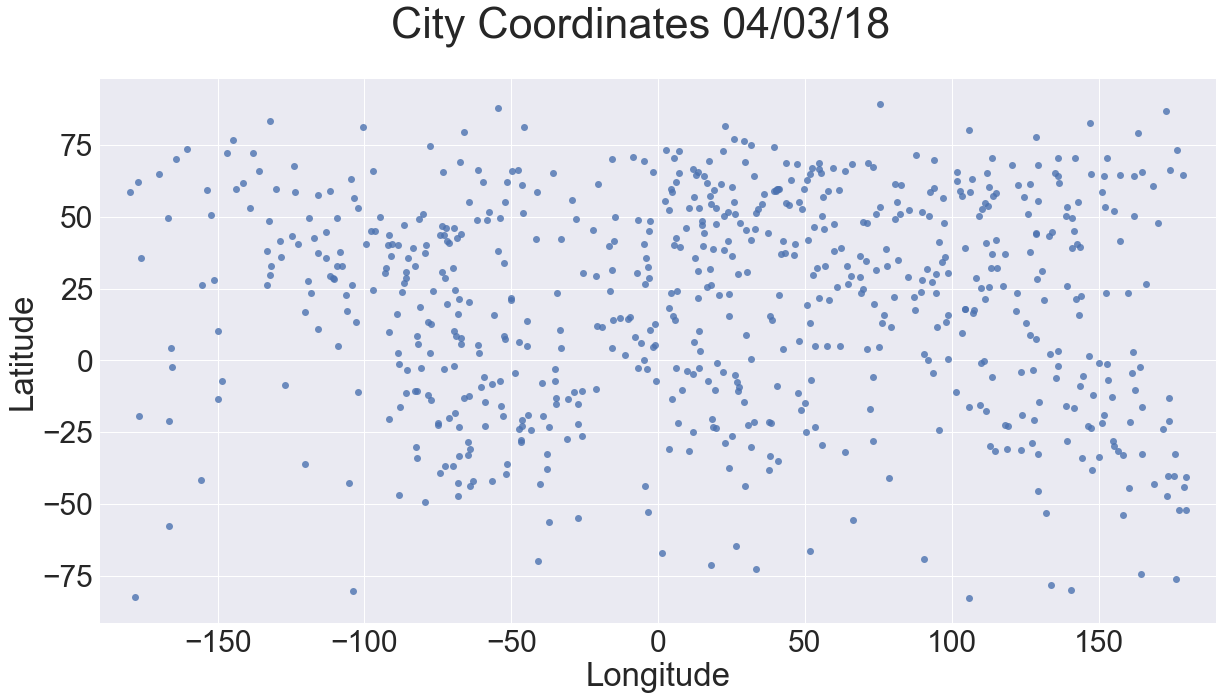

In [19]:
sns.set(font_scale=3)
ax, fig = plt.subplots(figsize=(20,10))
plt.xlim(-190, 190)
sns.set_style("whitegrid", {'axes.grid' : True})
sns.regplot(x=df['Longitude'], y=df['Latitude'], fit_reg=False)
ax.suptitle('City Coordinates ' + the_date)
plt.savefig('lat_long.png')

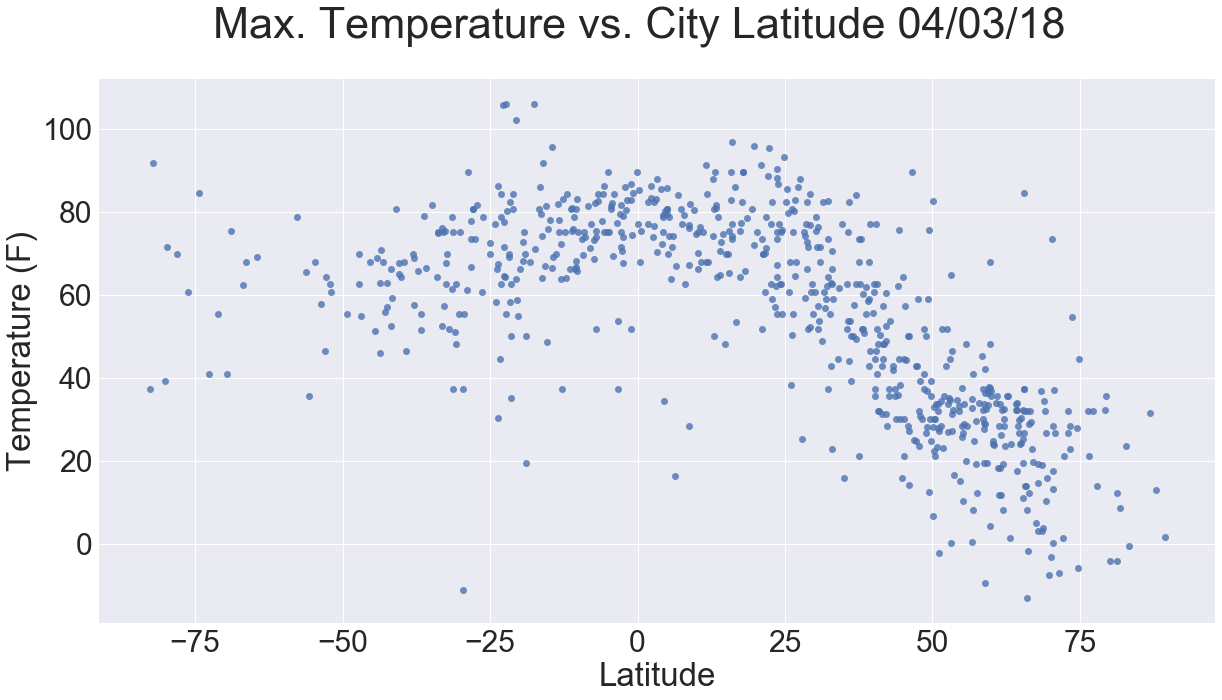

In [20]:
sns.set(font_scale=3)
ax, fig = plt.subplots(figsize=(20,10))
sns.set_style("whitegrid", {'axes.grid' : True})
sns.regplot(x=df['Latitude'], y=df['Temperature (F)'], fit_reg=False)
ax.suptitle('Max. Temperature vs. City Latitude ' + the_date)
plt.savefig('temp_lat.png')
plt.show()

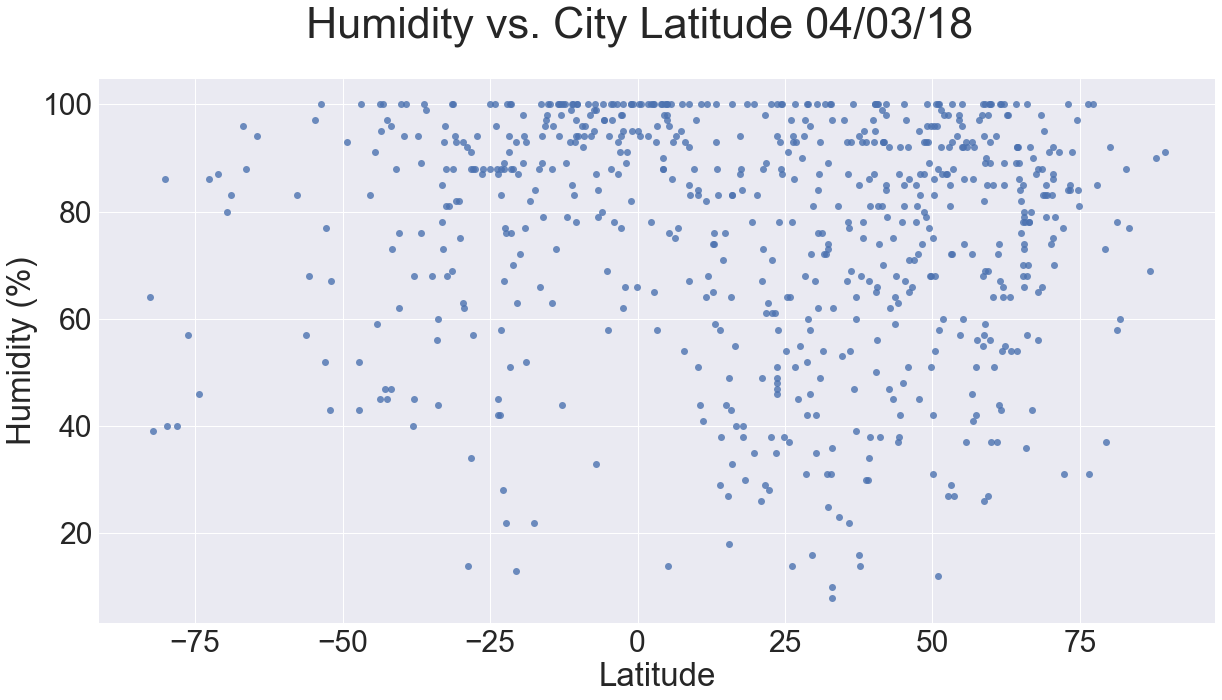

In [21]:
sns.set(font_scale=3)
ax, fig = plt.subplots(figsize=(20,10))
sns.set_style("whitegrid", {'axes.grid' : True})
sns.regplot(x=df['Latitude'], y=df['Humidity (%)'], fit_reg=False)
ax.suptitle("Humidity vs. City Latitude " + the_date)
plt.savefig('humid_lat.png')
plt.show()

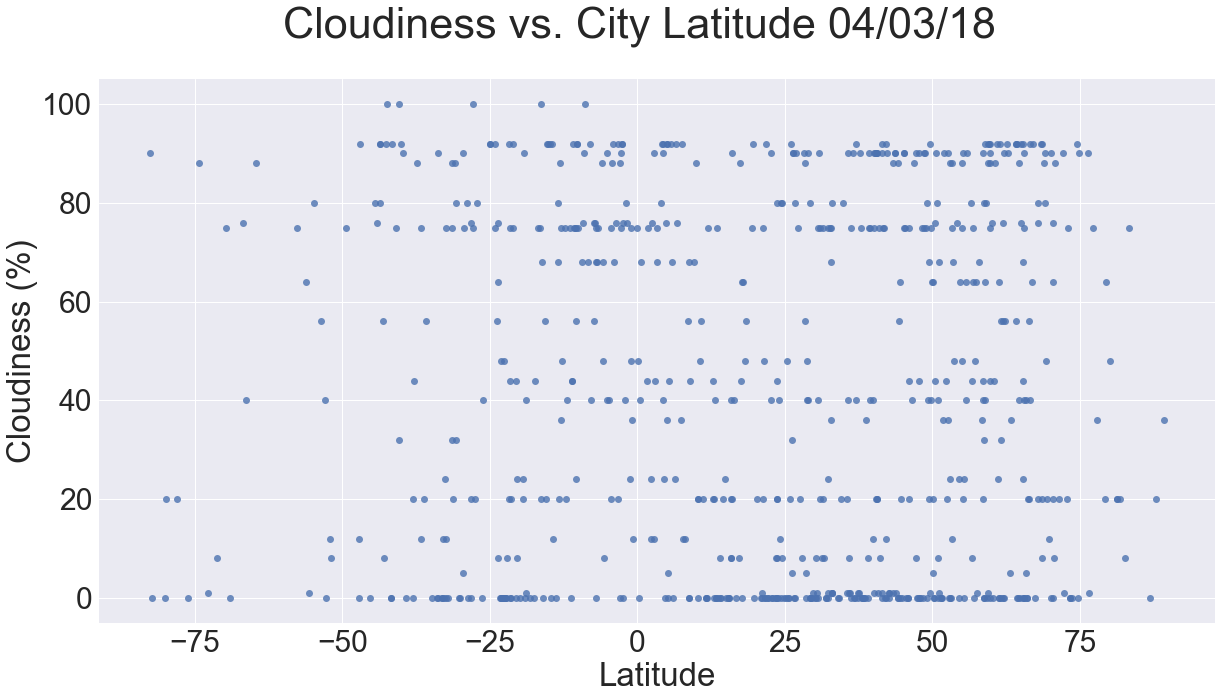

In [22]:
sns.set(font_scale=3)
ax, fig = plt.subplots(figsize=(20,10))
sns.regplot(x=df['Latitude'], y=df['Cloudiness (%)'], fit_reg=False)
ax.suptitle("Cloudiness vs. City Latitude " + the_date)
plt.savefig('cloud_lat.png')
plt.show()

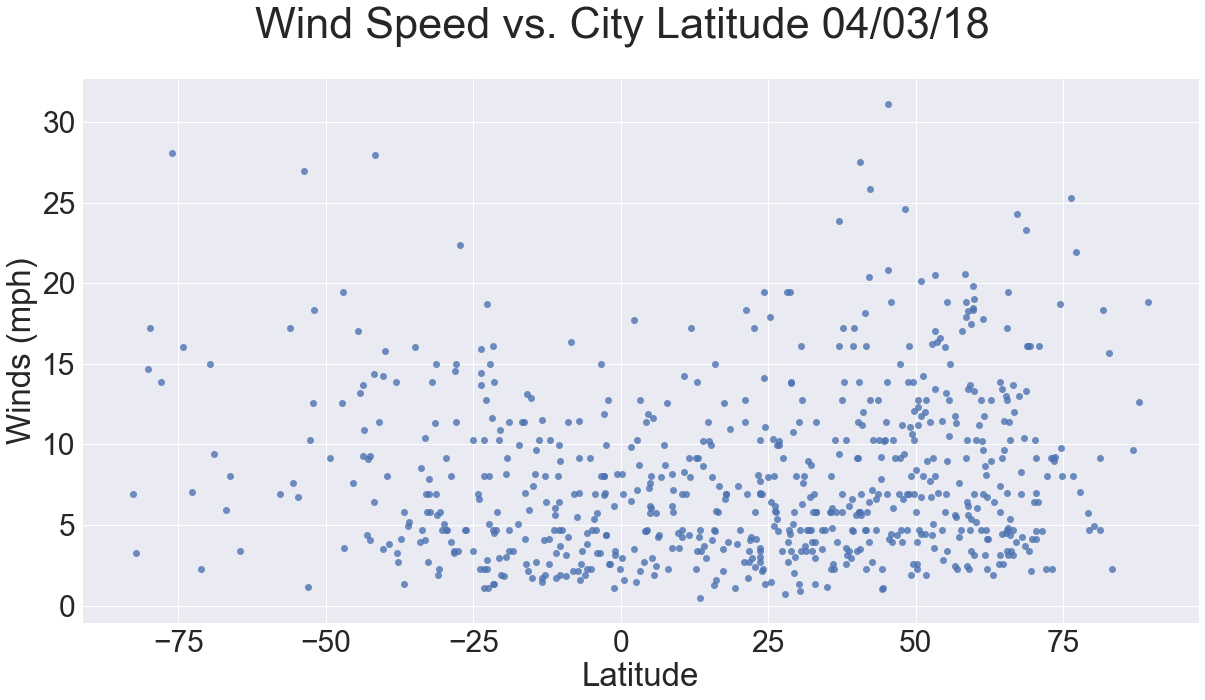

In [23]:
sns.set(font_scale=3)
ax, fig = plt.subplots(figsize=(20,10))
sns.regplot(x=df['Latitude'], y=df['Winds (mph)'], fit_reg=False)
ax.suptitle("Wind Speed vs. City Latitude " + the_date)
plt.savefig('winds_lat.png')
plt.show()

In [24]:
#End of Program